In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn; seaborn.set_theme()  # plot formatting
import pandas as pd


from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, validation_curve, learning_curve, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# Import Dataset
Creating a case study dedicated to understand the basics related to *Hyperparameters and Model Validation*

In [2]:
df = datasets.load_iris()
X = df.data
y = df.target

# Model KNN (Case 1)

In [3]:
# creating the model
model = KNeighborsClassifier(n_neighbors=1)

# fitting to predict
model.fit(X, y)
y_model = model.predict(X)

# checking accuracy
print(f'Model accuracy: {accuracy_score(y, y_model)*100}%')

Model accuracy: 100.0%


Flaws in this approach:
- No distinction between train, test, validation
- Trains and evaluates on the same data
- In this case $n_{neighbors}=1 \rightarrow$ *label of unknown-point = label of its nearest neighbor*

# Model using *Holdout Sets* (Case 2)
In this case, we 'hold' some data to checj the model performance.

In [4]:
# split data with 50% for each set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0, train_size=.50)

# fitting model on one set
model.fit(X_train, y_train)

# evalute new model 
y2_model = model.predict(X_test)
print(f'Accuracy of the model: {accuracy_score(y_test, y2_model)*100}%')

Accuracy of the model: 91.66666666666666%


Flaws in this approach:
- Still doesn't consider a validation dataset
- 'Loss' of dataset to the model training $\rightarrow$ a problem when dealing with a small dataset

# Model considering validation via cross-validation (Case 3)
In this case, the algorithm works by doing a sequence of fits where each subset of the data is used both as a trainig set and a validation set.

In [5]:
# for example, 5 cross-validation iterations
five_cv = cross_val_score(model, X, y, cv=5)
print(five_cv)

print(f'Mean of accuracy {five_cv.mean()*100}%')

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean of accuracy 96.0%


In [6]:
# extreme case where the number of folds is equal to the number of data points
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores)

print(f'Mean of accuracy: {scores.mean()*100}%')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean of accuracy: 96.0%


- What if our estimator is underperforming?
- How to cope with this?

# Overfitting and Underfitting

In [7]:
x = np.linspace(0, 1, 1000)[:, None]
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

In [8]:
# creating aritificial data
def make_data(N=30, err=.80, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1)**2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

# create a pipeline to create poly-reg.
Poly_reg = lambda degree=2, **kwargs: make_pipeline(PolynomialFeatures(degree),
                                                    LinearRegression(**kwargs))

X, y = make_data(40)

In [9]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = Poly_reg(1).fit(X, y)
model20 = Poly_reg(20).fit(X, y)

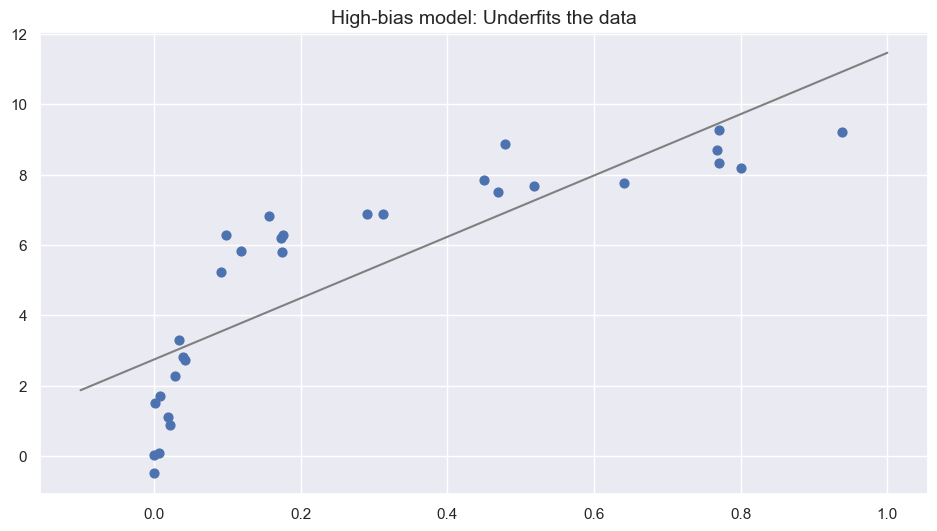

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax.scatter(X.ravel(), y, s=40)
ax.plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax.set_title('High-bias model: Underfits the data', size=14);

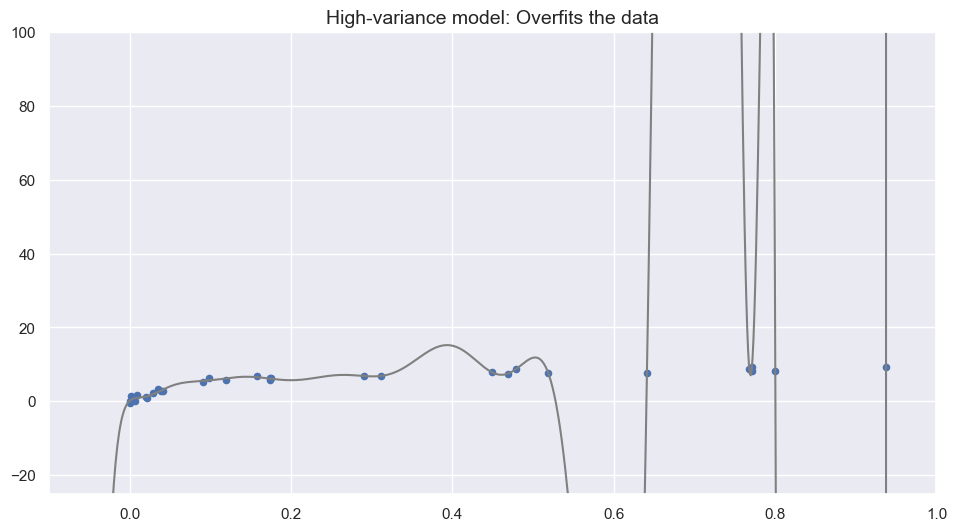

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax.scatter(X.ravel(), y, s=20)
ax.plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax.axis([-0.1, 1.0, -25, 100])
ax.set_title('High-variance model: Overfits the data', size=14);

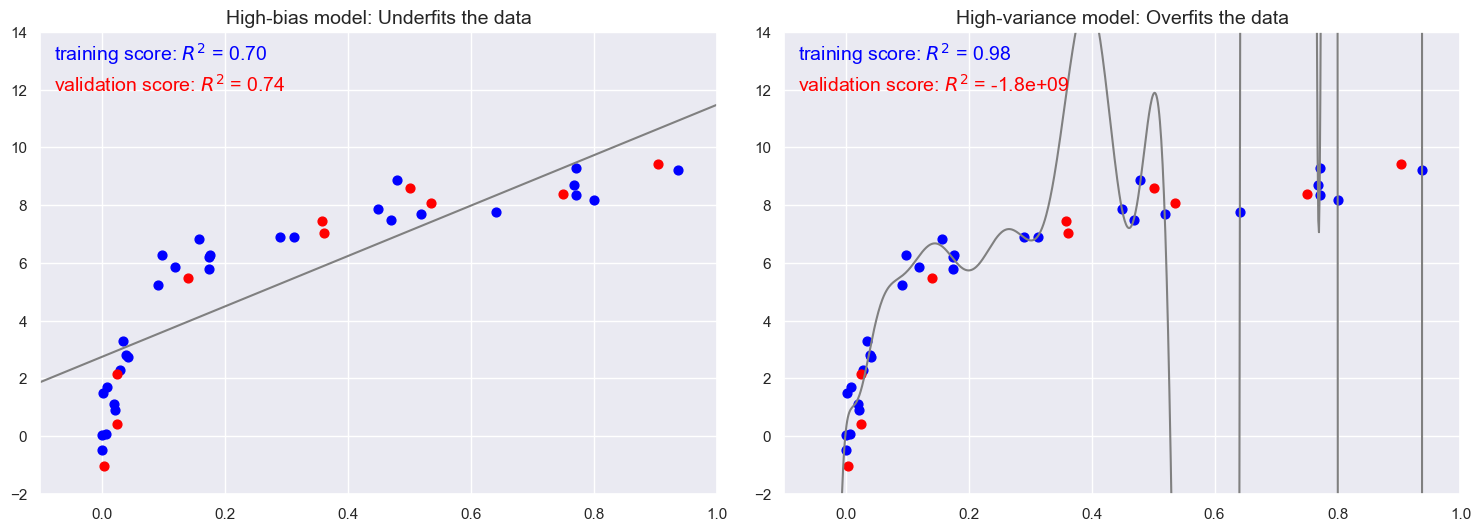

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red');

Conclusions from the plot:
- High-bias models $\rightarrow\;\;R^2_{\;training}\; \leq \;R^2_{\;validation}$
- High-variance models $\rightarrow\;\; R^2_{\;validation} \lt \lt \;R^2_{\;training}$


Great! There's a way to visualize the fitting performance by looking into the graphic below.

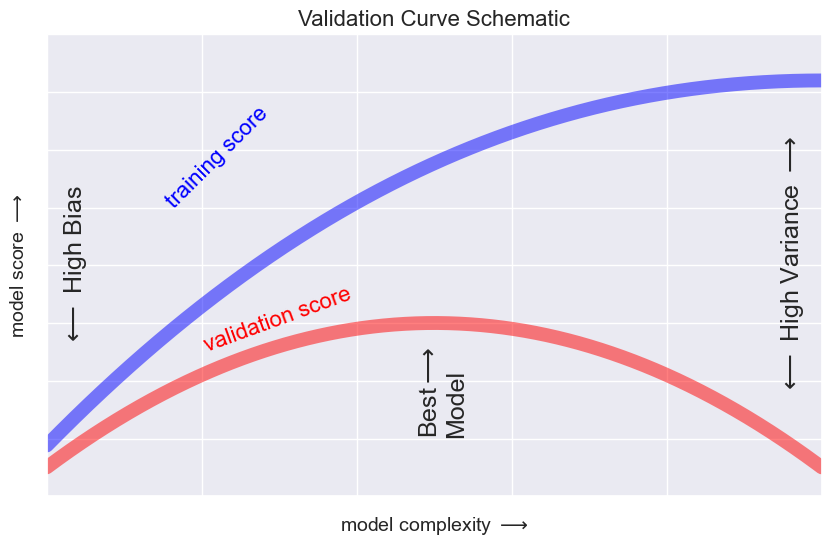

In [13]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16);

From the plot above:
- Training score > Validation score: model do better fit to data it's seen.
- High bias: model fails to predict both training and validation data $\rightarrow$ *low complexity model*
- High Variance: training set is overfit: 'memorizes' data and doesn't learn $\rightarrow$ *high complexity model*
- **Best model**: suitable trade-off between bias and variance


So, one way to get around these limitations is by trial: we'll be taking our `pol_reg` function and plot the adjusment based on the polinomial degree.

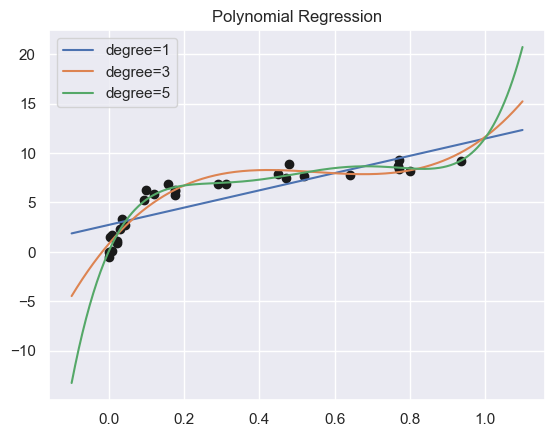

In [14]:
# visualize data with several degreees
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='k')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = Poly_reg(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label=f'degree={degree}')
plt.legend(loc='best')
plt.title('Polynomial Regression');

However, thinking as a data scientist remains the following question:  
**What degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)?**  
Hint: use the `validation_curve` feature from Scikit-Learn $\rightarrow$ givena model, data, parameter, name and a range to explore.

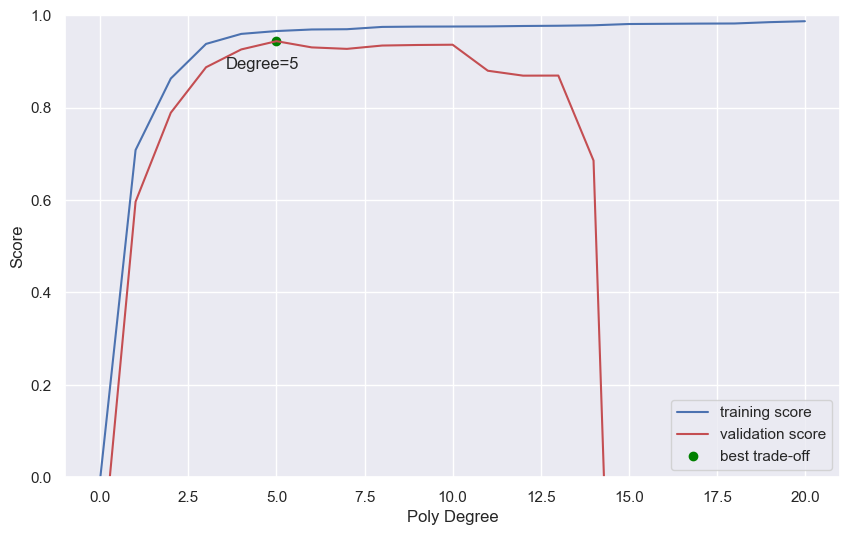

In [15]:
degree = np.arange(0, 21)

train_score, val_score = validation_curve(Poly_reg(), X, y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,
                                          cv=7)

fig = plt.subplots(figsize=(10,6))
plt.plot(degree, np.median(train_score, 1), color='b', label='training score')
plt.plot(degree, np.median(val_score, 1), color='r', label='validation score')

best_degree = np.argmax(np.median(val_score, 1))
plt.scatter(degree[best_degree], np.median(val_score, 1)[best_degree], color='green', label='best trade-off')
plt.annotate(f'Degree={degree[best_degree]}', (degree[best_degree], np.median(val_score, 1)[best_degree]), 
             textcoords='offset points', xytext=(-10,-20), ha='center')

plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.xlabel('Poly Degree')
plt.ylabel('Score');

As expected,
- $R^2_{\;training} \gt R^2_{\;validation}$
  
- $\uparrow$ model complexity: $R^2_{\;training} \rightarrow 1$
  
Optimal trade-off: 5-th degree polynomial


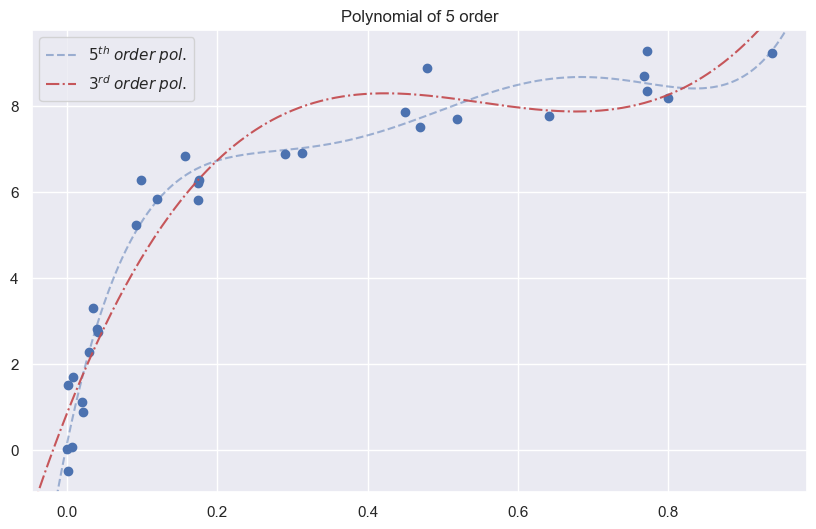

In [23]:
fig = plt.subplots(figsize=(10,6))

y_test = Poly_reg(best_degree).fit(X, y).predict(X_test)
y_test_ = Poly_reg(3).fit(X, y).predict(X_test)

plt.scatter(X.ravel(), y)
lim= plt.axis()
plt.title(f'Polynomial of {best_degree} order')
plt.plot(X_test.ravel(), y_test, 'b--', alpha=0.5, label='$5^{th}\;order\;pol.$')
plt.plot(X_test.ravel(), y_test_, 'r-.', alpha=0.95, label='$3^{rd}\;order\;pol.$')
plt.legend(loc='best')
plt.axis(lim);

In this plotting we can see that a 5-th order polynomial shows a very good fit, agreeing with our remarks above with the 'best trade-off' marker. However, it seems that the points near x=0.8 seems a little noisy and maybe would shift the curve to better fit the data. That's an example of how important it is to have a good procedure of **data cleaning**. 

# Learning Curves
The optimal model will generally depend on the size of your data.

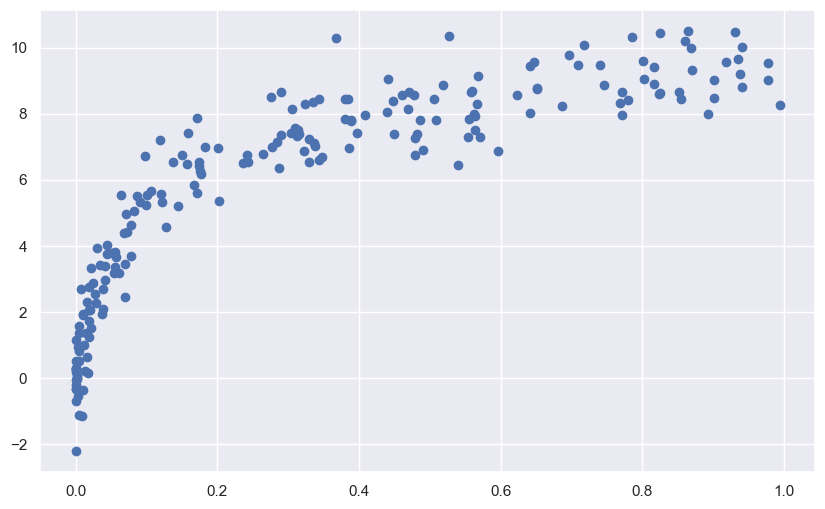

In [27]:
fig = plt.subplots(figsize=(10,6))

X2, y2 = make_data(200)
plt.scatter(X2, y2);

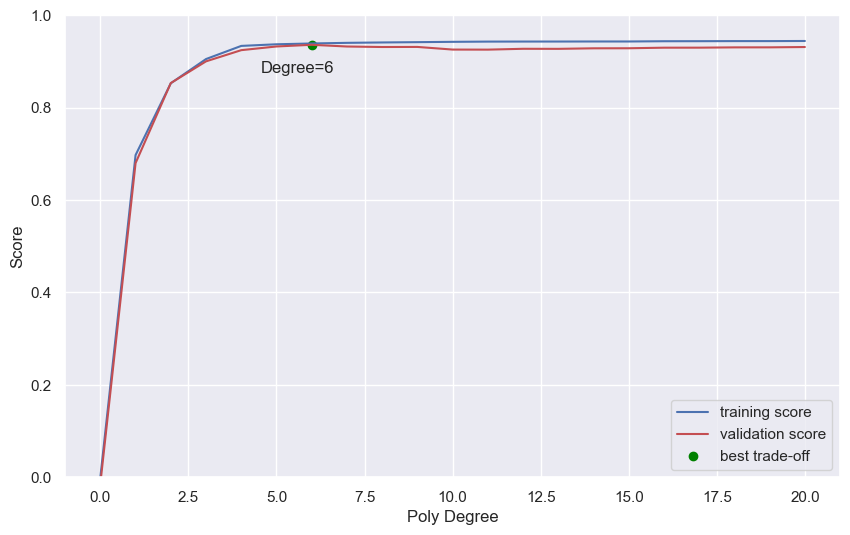

In [68]:
degree = np.arange(21)

train_score2, val_score2 = validation_curve(Poly_reg(), X2, y2,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,
                                          cv=7)

fig = plt.subplots(figsize=(10,6))
plt.plot(degree, np.median(train_score2, 1), color='b', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='r', label='validation score')

best_degree = np.argmax(np.median(val_score2, 1))
plt.scatter(degree[best_degree], np.median(val_score2, 1)[best_degree], color='green', label='best trade-off')
plt.annotate(f'Degree={degree[best_degree]}', (degree[best_degree], np.median(val_score2, 1)[best_degree]), 
             textcoords='offset points', xytext=(-10,-20), ha='center')

plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.xlabel('Poly Degree')
plt.ylabel('Score');

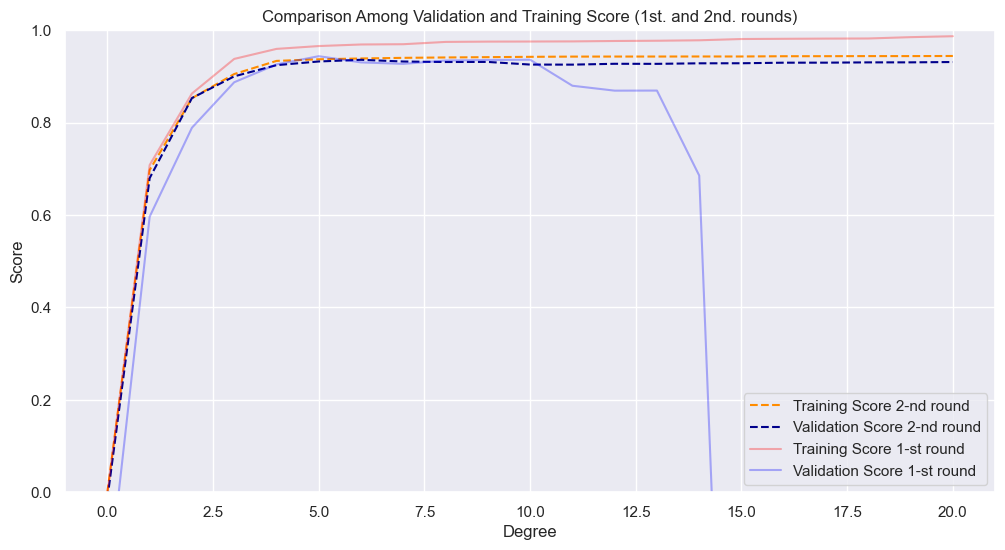

In [69]:
fig = plt.subplots(figsize=(12,6))

plt.plot(degree, np.median(train_score2, 1), color='darkorange', ls='dashed', label='Training Score 2-nd round')
plt.plot(degree, np.median(val_score2, 1), color='darkblue', ls='dashed', label='Validation Score 2-nd round')
plt.plot(degree, np.median(train_score, 1), color='red', ls='solid', alpha=0.30, label='Training Score 1-st round')
plt.plot(degree, np.median(val_score, 1), color='blue', ls='solid', alpha=0.30, label='Validation Score 1-st round')
plt.title('Comparison Among Validation and Training Score (1st. and 2nd. rounds)')
plt.xlabel('Degree'); plt.ylabel('Score'); plt.legend(loc='lower right'); plt.ylim(0,1);

Conclusions:
- The larger the dataset, more complex is the model (higher order polynomials)
- For a very large order (say a 20 degree model) the validation and training scores remain very close
- Two important inputs: degree of pol., and training points
  
General beahviour of a learning curve:
- Small datasets: high risk of *overfitting* (High bias, Low variance)
- Large datasets: risks related to *underfitting* (Low bias, High variance)
- Curves of training and validation should get close to each other, but never cross
  
Therefore, the next figure shows what's expected from *Learning Curve Scheme*:
- For enough points, **adding more data will not help!**
- Often to improve is necessary another model (usually more complex)

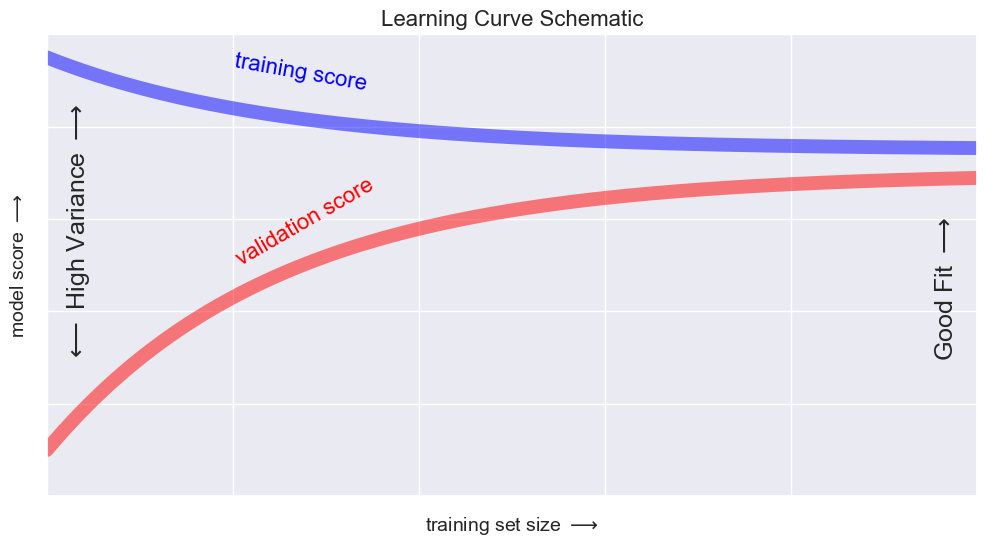

In [73]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, y1, lw=10, alpha=0.5, color='blue')
ax.plot(x, y2, lw=10, alpha=0.5, color='red')

ax.text(0.2, 0.88, "training score", rotation=-10, size=16, color='blue')
ax.text(0.2, 0.5, "validation score", rotation=30, size=16, color='red')

ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Learning Curve Schematic", size=16);

c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:2061: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 19 instead of 25.
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:2061: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 19 instead of 25.
  warnings.warn(


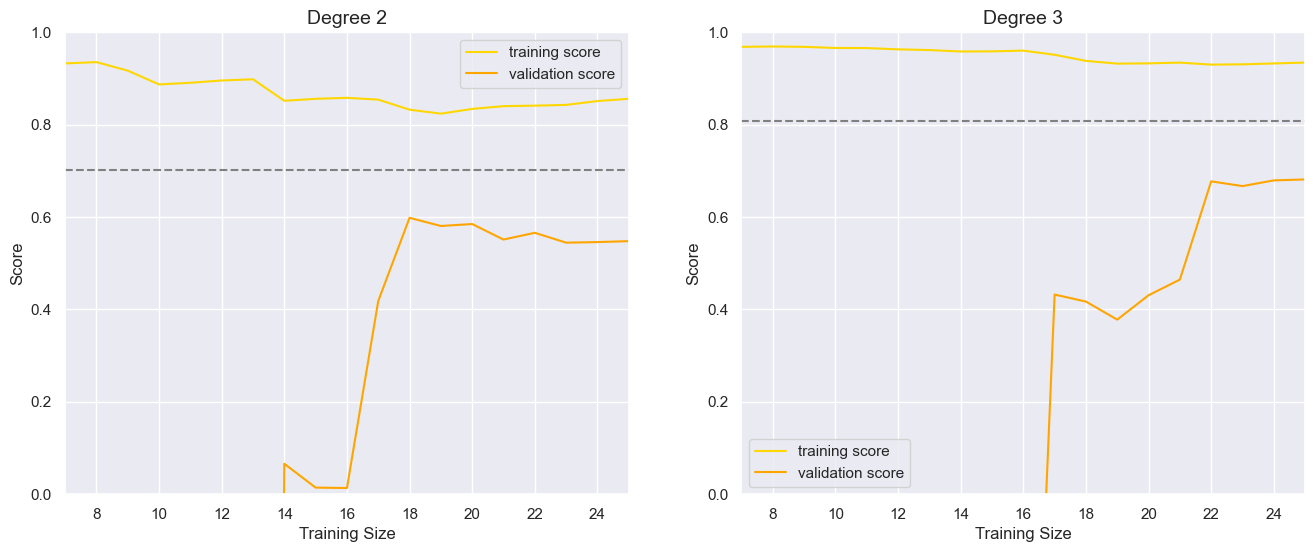

In [86]:
# plotting for polynomials in different degrees
fig, ax = plt.subplots(1, 2, figsize=(16,6))

for i, degree in enumerate([2, 3]):
    N, train_lc, val_lc = learning_curve(Poly_reg(degree), X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1 ,25))

    ax[i].plot(N, np.mean(train_lc, 1), color='gold', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='orange', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', ls='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Training Size')
    ax[i].set_ylabel('Score')
    ax[i].set_title(f'Degree {degree}', size=14)
    ax[i].legend(loc='best');

Important remarks:
- Lower degree models will give a faster (lower training size/ Epochs) than more complex ones
- More complex models will result in an increase in score convergence (dashed line) but at expense of higher variance

# Validation in Practice: Grid Search
Usually, models present more than 1 or 2 parameters to tune and visualizations are less prominent to show advances.  
Therefore, we'll be using automated tools using the *grid search* module using the `GridSearchCV`.

In [95]:
params_grid = {'polynomialfeatures__degree': np.arange(21),
               'linearregression__fit_intercept': [True, False]}

In [96]:
grid = GridSearchCV(Poly_reg(), params_grid, cv=7)

In [97]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [99]:
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 5}

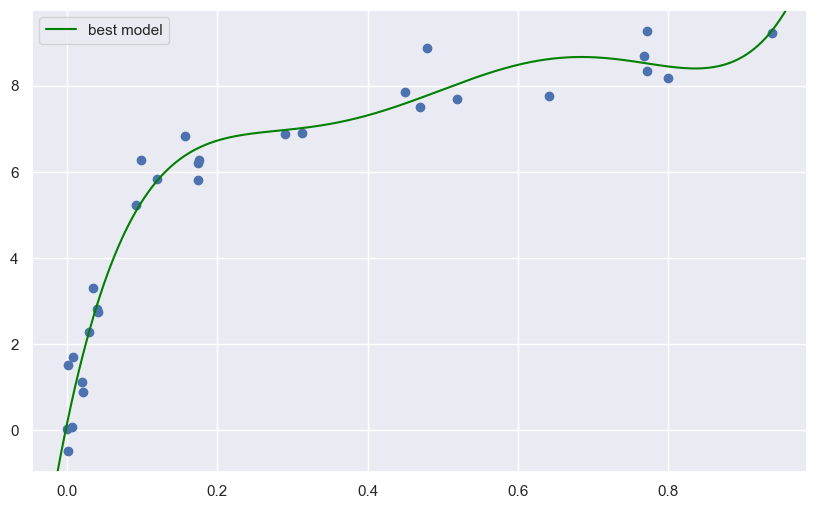

In [103]:
# using the best model
fig = plt.subplots(figsize=(10,6))
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test, label='best model', color='green')
plt.legend(loc='best')
plt.axis(lim);